In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [ ]:
# Data from https://www.ncsbe.gov/results-data/voter-registration-data
# Downloaded 11/7/25

## Load the Watauga and NC datasets

In [2]:
file = 'ncvoter95.txt'

wat_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year'],
    encoding="latin-1",  
)
wat_df.head()

,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year
0,28608.0,09/24/2019,U,UN,UNA,U,2001
1,28607.0,09/24/2015,W,NL,UNA,M,1996
2,28604.0,04/11/2017,W,NL,DEM,F,1963
3,28607.0,08/24/2017,W,NL,DEM,F,1999
4,28607.0,10/25/2024,A,NL,UNA,M,2003


In [3]:
file = 'ncvoter_Statewide.txt'

nc_df = pd.read_csv(
    file,
    delimiter="\t",        
    usecols = ['zip_code', 'registr_dt', 'race_code', 'ethnic_code', 'party_cd', 'gender_code', 'birth_year'],
    encoding="latin-1",   
)
nc_df.head()

,zip_code,registr_dt,race_code,ethnic_code,party_cd,gender_code,birth_year
0,NaN,10/01/1984,W,NL,UNA,F,1935
1,NaN,02/23/2018,W,UN,UNA,F,1978
2,27302.0,10/31/2020,W,UN,REP,M,1966
3,27215.0,03/26/1996,W,UN,UNA,F,1976
4,27215.0,08/15/1989,W,NL,UNA,F,1945


In [4]:
nc_df.count()

zip_code       7781761
registr_dt     8966557
race_code      8966557
ethnic_code    8966557
party_cd       8966557
gender_code    8966557
birth_year     8966557
dtype: int64

## Clean and filter Watauga dataset

In [5]:
wat_df = wat_df[wat_df['registr_dt'] != '##/##/####']
wat_df['registr_dt'] = pd.to_datetime(wat_df['registr_dt'])
wat_df = wat_df.set_index('registr_dt')

wat_df_asc = wat_df.sort_index(ascending=True)

In [6]:
wat_df_asc.head()

,zip_code,race_code,ethnic_code,party_cd,gender_code,birth_year
registr_dt,,,,,,
1959-08-02,NaN,W,NL,REP,F,1936
1964-10-08,28692.0,W,NL,REP,M,1944
1965-10-25,NaN,W,NL,REP,F,1924
1968-08-02,28692.0,W,NL,REP,M,1938
1968-10-25,NaN,W,NL,REP,M,1943


In [7]:
wat_current = wat_df_asc.loc['2025-08-01':]
wat_past = wat_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(wat_past) - len(wat_current)) / len(wat_past)
print(f'The 2023 Watauga election had a registration count of {len(wat_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(wat_current)}; a {percent:.1%} decrease.')

The 2023 Watauga election had a registration count of 1889, while the 2025 election cycle had a registration count of 1574; a 16.7% decrease.


## Clean and filter NC dataset

In [8]:
nc_df = nc_df[nc_df['registr_dt'] != '##/##/####']
nc_df['registr_dt'] = pd.to_datetime(nc_df['registr_dt'])
nc_df = nc_df.set_index('registr_dt')

nc_df_asc = nc_df.sort_index(ascending=True)

In [9]:
nc_current = nc_df_asc.loc['2025-08-01':]
nc_past = nc_df_asc.loc['2023-08-01':'2023-11-07']
percent = (len(nc_past) - len(nc_current)) / len(nc_past)
print(f'The 2023 NC election had a new registration count of {len(nc_past)}, while the 2025 election cycle ' +
      f'had a registration count of {len(nc_current)}; a {percent:.1%} decrease.')

The 2023 NC election had a new registration count of 128182, while the 2025 election cycle had a registration count of 107407; a 16.2% decrease.


## Plots!

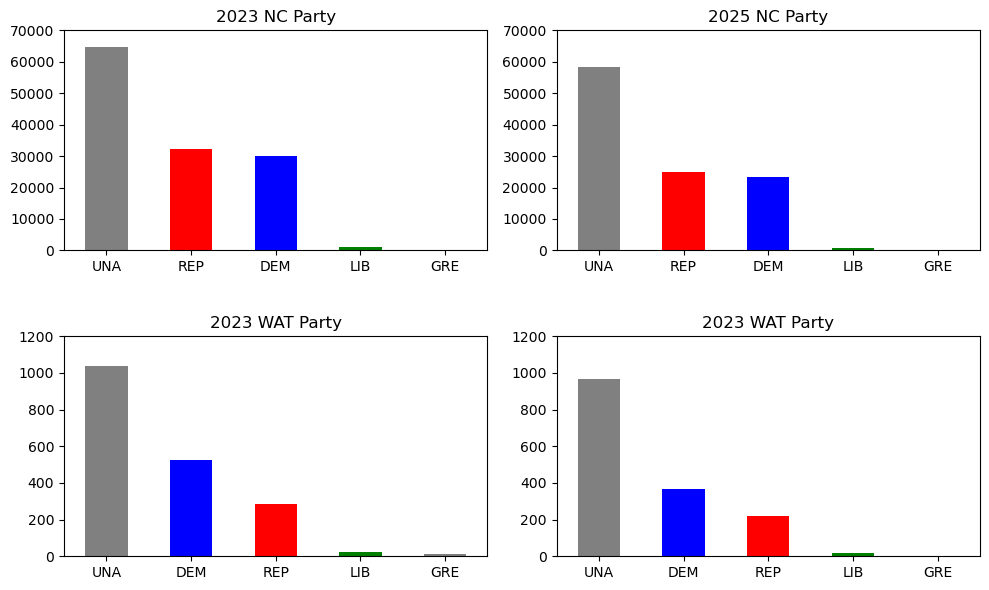

In [10]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['party_cd'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 70000), color = ['grey', 'red', 'blue', 'green'], title = '2023 NC Party', rot = 0)
nc_current['party_cd'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 70000), color = ['grey', 'red', 'blue', 'green'], title = '2025 NC Party', rot = 0)

wat_past['party_cd'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1200), color = ['grey', 'blue', 'red', 'green'], title = '2023 WAT Party', rot = 0)
wat_current['party_cd'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1200), color = ['grey', 'blue', 'red', 'green'], title = '2023 WAT Party', rot = 0)

plt.tight_layout(h_pad=3.0) 


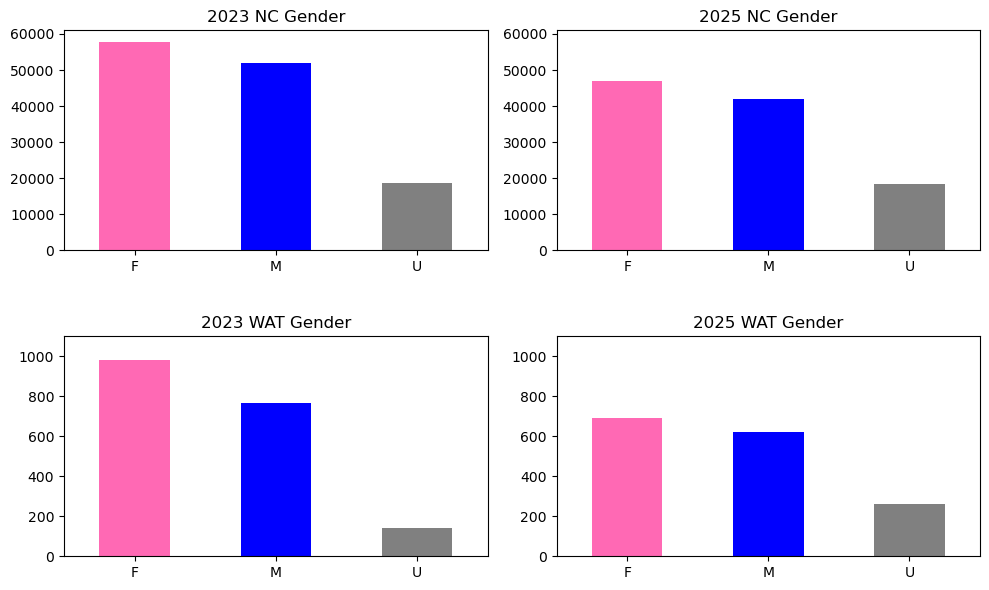

In [11]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['gender_code'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 61000), color = ['hotpink', 'blue', 'grey'], title = '2023 NC Gender', rot = 0)
nc_current['gender_code'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 61000), color = ['hotpink', 'blue', 'grey'], title = '2025 NC Gender', rot = 0)

wat_past['gender_code'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1100), color = ['hotpink', 'blue', 'grey'], title = '2023 WAT Gender', rot = 0)
wat_current['gender_code'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1100), color = ['hotpink', 'blue', 'grey'], title = '2025 WAT Gender', rot = 0)

plt.tight_layout(h_pad=3.0) 


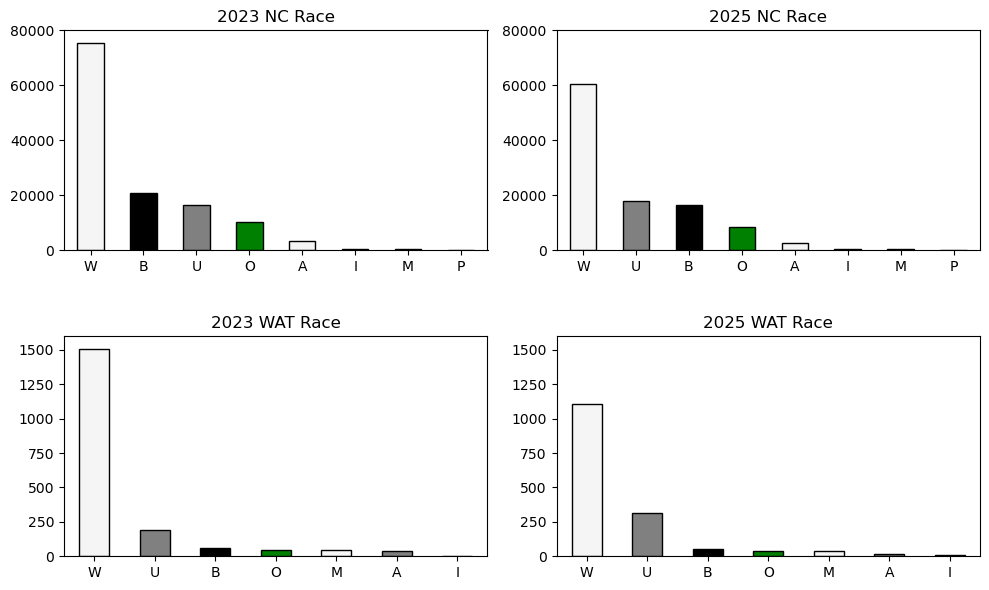

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (10, 6))

nc_past['race_code'].value_counts().plot.bar(ax = axes[0,0], ylim=(0, 80000), color = ['whitesmoke', 'black', 'grey', 'green'], edgecolor='black', title = '2023 NC Race', rot = 0)
nc_current['race_code'].value_counts().plot.bar(ax = axes[0,1], ylim=(0, 80000), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2025 NC Race', rot = 0)

wat_past['race_code'].value_counts().plot.bar(ax = axes[1,0], ylim=(0, 1600), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2023 WAT Race', rot = 0)
wat_current['race_code'].value_counts().plot.bar(ax = axes[1,1], ylim=(0, 1600), color = ['whitesmoke', 'grey', 'black', 'green'], edgecolor='black', title = '2025 WAT Race', rot = 0)

plt.tight_layout(h_pad=3.0) 


In [ ]:
# Explore UNA data

una_nc_past = nc_past[nc_past['party_cd'] == 'UNA']
una_nc_current = nc_current[nc_current['party_cd'] == 'UNA']

una_wat_past = wat_past[wat_past['party_cd'] == 'UNA']
una_wat_current = wat_current[wat_current['party_cd'] == 'UNA']


In [24]:
wat_current['party_cd'].value_counts()

UNA    969
DEM    365
REP    219
LIB     17
GRE      4
Name: party_cd, dtype: int64